The dataset used here consists of chessboard images, which are labeled based on the positions of the pieces. Each image represents a unique configuration of a chessboard, and the task is to classify these images to identify the chess pieces and their positions.

This code is loading the dataset in this environment and making sure the structure is correct

In [1]:
import os

# Define paths
base_dir = '/Users/kavya/Downloads/Chessman-image-dataset/Chess'

# List the directories to check if they are correctly organized
for root, dirs, files in os.walk(base_dir):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")

# Check if each directory contains images
for subdir in os.listdir(base_dir):
    subdir_path = os.path.join(base_dir, subdir)
    if os.path.isdir(subdir_path):
        print(f"Directory: {subdir}")
        images = os.listdir(subdir_path)
        print(f"Number of images in {subdir}: {len(images)}")
    else:
        print(f"{subdir} is not a directory.")

Root: /Users/kavya/Downloads/Chessman-image-dataset/Chess
Directories: ['Bishop', 'Rook', 'Pawn', 'Knight', 'King', 'Queen']
Files: []
Root: /Users/kavya/Downloads/Chessman-image-dataset/Chess/Bishop
Directories: []
Files: ['00000158.jpg', '00000010.jpg', '00000004.jpg', '00000011.jpg', '00000039.jpg', '00000167.jpg', '00000007.jpg', '00000013.jpg', '00000012.jpg', '00000006.jpg', '00000199.jpg', '00000189.jpg', '00000002.JPG', '00000016.jpg', '00000003.png', '00000017.jpg', '00000188.jpg', '00000177.jpg', '00000175.jpg', '00000149.jpg', '00000001.jpg', '00000015.png', '00000095.gif', '00000028.jpg', '00000000.JPG', '00000174.jpg', '00000113.png', '00000066.jpg', '00000112.jpg', '00000138.jpg', '00000110.jpg', '00000070.jpg', '00000071.png', '00000115.jpg', '00000129.jpg', '00000061.jpg', '00000075.jpg', '00000049.jpg', '00000074.jpg', '00000114.jpg', '00000102.jpg', '00000062.jpg', '00000089.jpg', '00000088.jpg', '00000117.jpg', '00000103.jpg', '00000126.jpg', '00000127.jpg', '0000007

In [2]:
pip install tensorflow


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install pandas matplotlib zipfile os 

ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile

[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import zipfile
import os

In [5]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

In [6]:
train_directory= "/Users/kavya/Downloads/Chessman-image-dataset"

In [7]:
import os

def clean_directory(path):
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.startswith('.'):
                os.remove(os.path.join(root, file))

train_dir = '/Users/kavya/Downloads/Chessman-image-dataset/Chess'
clean_directory(train_dir)

In [8]:
for root, dirs, files in os.walk(train_directory):
    for file in files:
        if file == '.DS_Store':
            os.remove(os.path.join(root, file))

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

The data is normalised to fall within the range of 0 and 1. 

In [10]:
train_image_generator = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
)

In [11]:
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_directory,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical',
    subset='training'
)

Found 441 images belonging to 1 classes.


In [12]:
val_data_gen = train_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_directory,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical',
    subset='validation'
)

Found 110 images belonging to 1 classes.


In [13]:
print("Classes found:", train_data_gen.class_indices)


Classes found: {'Chess': 0}


In [14]:
sample_training_images, sample_training_labels = next(train_data_gen)
print(f"Sample training images shape: {sample_training_images.shape}")
print(f"Sample training labels shape: {sample_training_labels.shape}")

Sample training images shape: (32, 128, 128, 3)
Sample training labels shape: (32, 1)


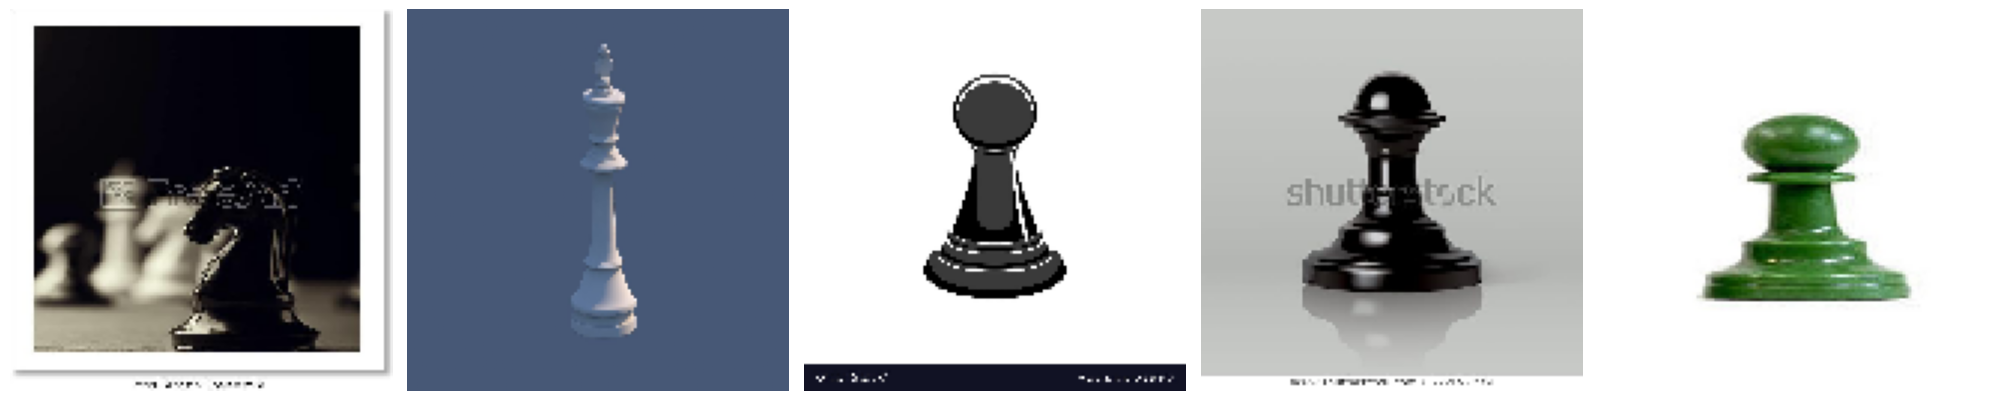

In [15]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])

Building the CNN Model
   - Explanation: Here, we define the architecture of the CNN. A CNN is particularly effective for image classification tasks as it automatically detects the important features in the images.
   - Layers:
     - Conv2D: Applies 32 convolution filters of size 3x3 to the input image, followed by the ReLU activation function. The ReLU activation function is defined as `f(x) = max(0, x)`, which introduces non-linearity to the model.
     - MaxPooling2D: Reduces the spatial dimensions of the output volume.
     - Conv2D and MaxPooling2D Additional layers for deeper feature extraction.
     - Flatten Converts the 2D matrix data to a vector to be input to the fully connected layer.
     - Dense Fully connected layer with 64 units and ReLU activation. The ReLU activation function is defined as `f(x) = max(0, x)`.
     - Dense: Output layer with 10 units (for 10 classes) and softmax activation. The softmax function is defined as `σ(z)_j = exp(z_j) / Σ_k exp(z_k)`, which converts logits into probabilities.

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(train_data_gen.num_classes, activation='softmax')
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilation and Training
compiling the Model
   - Explanation:The model is compiled with the Adam optimizer, sparse categorical crossentropy loss function, and accuracy metric. 
   - Loss Function:The sparse categorical crossentropy loss function is defined as `L = -Σ(y_true * log(y_pred))`, where `y_true` are the true labels and `y_pred` are the predicted probabilities.
   - Optimizer: Adam is an optimization algorithm that adjusts the learning rate based on the first and second moments of the gradients.


In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

The model is trained using the training dataset for 10 epochs. During each epoch, the model processes all the training images, updates its weights to minimize the loss function, and evaluates its performance on the validation dataset.

In [18]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // BATCH_SIZE,
    epochs=10,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // BATCH_SIZE
)

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can inc

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10


2024-07-22 15:06:00.991374: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-07-22 15:06:01.013962: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 234ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10


2024-07-22 15:06:04.890665: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 9/10


2024-07-22 15:06:12.639644: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


After training, the model's performance is evaluated using the test dataset. The evaluation process computes the loss and accuracy on the test data, giving an indication of how well the model generalizes to new, unseen data.
The training and validation accuracy and loss are plotted to visualize the model's performance over the epochs. This helps in diagnosing underfitting or overfitting by comparing the trends in training and validation metrics.


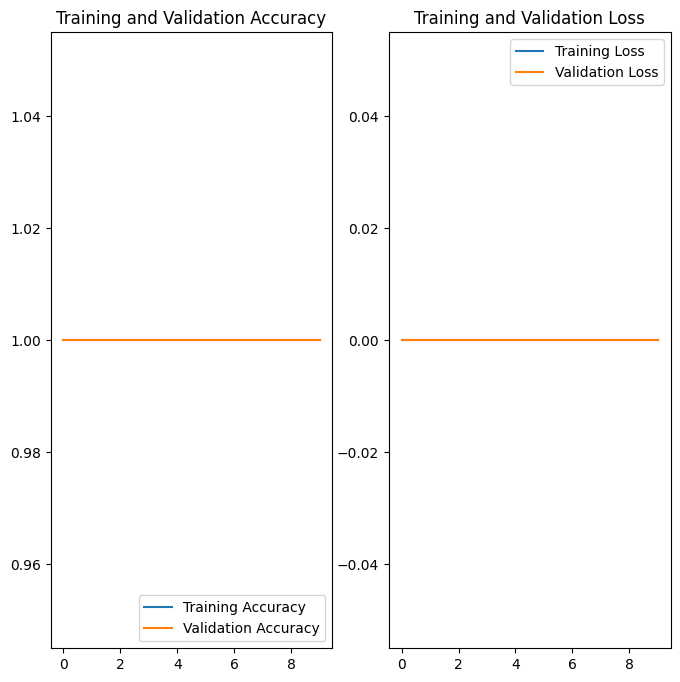

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()